# HR Attrition Analysis & Prediction

## Business Problem
Employee attrition is costly due to recruitment, onboarding, and lost productivity.  
This project aims to:

1) Identify key factors associated with employee attrition  
2) Build a simple predictive model to flag employees at risk  
3) Translate findings into actionable HR recommendations

## Stakeholder & Goal
**Stakeholder:** HR / People Analytics / Management  
**Decision supported:** Who is at higher attrition risk and what factors can HR act on?

## Target Variable
**Attrition** (Yes/No)

## Success Criteria
- **Primary metric:** Recall (identify as many at-risk employees as possible)
- **Secondary:** ROC-AUC (overall ranking quality)
- **Business focus:** Reduce avoidable attrition through targeted interventions

## Define:
* Target variable
* Business question (e.g. attrition / churn)
* Rename sections clearly:
* Data Overview
* Cleaning
* EDA
* Insights

## Clearly state:

- Target variable: Attrition (Yes/No)
- Stakeholder: HR / Management
- Success metric: Recall for attrition

# Phase 1: Data Acquisition & Problem Framing

In [1]:
import sys
print(sys.executable)

C:\Users\rayma\anaconda3\python.exe


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.set_option("display.max_columns", None)

In [3]:
df = pd.read_csv("C:/Users/rayma/Github/DATA ANALYST/HR Analytics/HR-Employee-Attrition.csv")

# Phase 2: Data Overview & Cleaning


## Step 2.1


This section reviews the dataset structure and performs minimal
cleaning to prepare the data for analysis and modelling.

## Step 2.2 — Inspect the data

In [4]:
df.shape

(1470, 35)

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
num_cols = df.select_dtypes(include=['number']).columns
obj_cols = df.select_dtypes(include=['object']).columns


In [9]:
num_cols

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [10]:
obj_cols

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [11]:
df.apply(lambda col: col.unique())

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

In [12]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1470.0,NaN,NaN,NaN,36.92381,9.135373,18.0,30.0,36.0,43.0,60.0
Attrition,1470,2,No,1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BusinessTravel,1470,3,Travel_Rarely,1043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DailyRate,1470.0,NaN,NaN,NaN,802.485714,403.5091,102.0,465.0,802.0,1157.0,1499.0
Department,1470,3,Research & Development,961,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DistanceFromHome,1470.0,NaN,NaN,NaN,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
Education,1470.0,NaN,NaN,NaN,2.912925,1.024165,1.0,2.0,3.0,4.0,5.0
EducationField,1470,6,Life Sciences,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeCount,1470.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
EmployeeNumber,1470.0,NaN,NaN,NaN,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0


### Checking duplication

In [15]:
df.duplicated().sum()


np.int64(0)

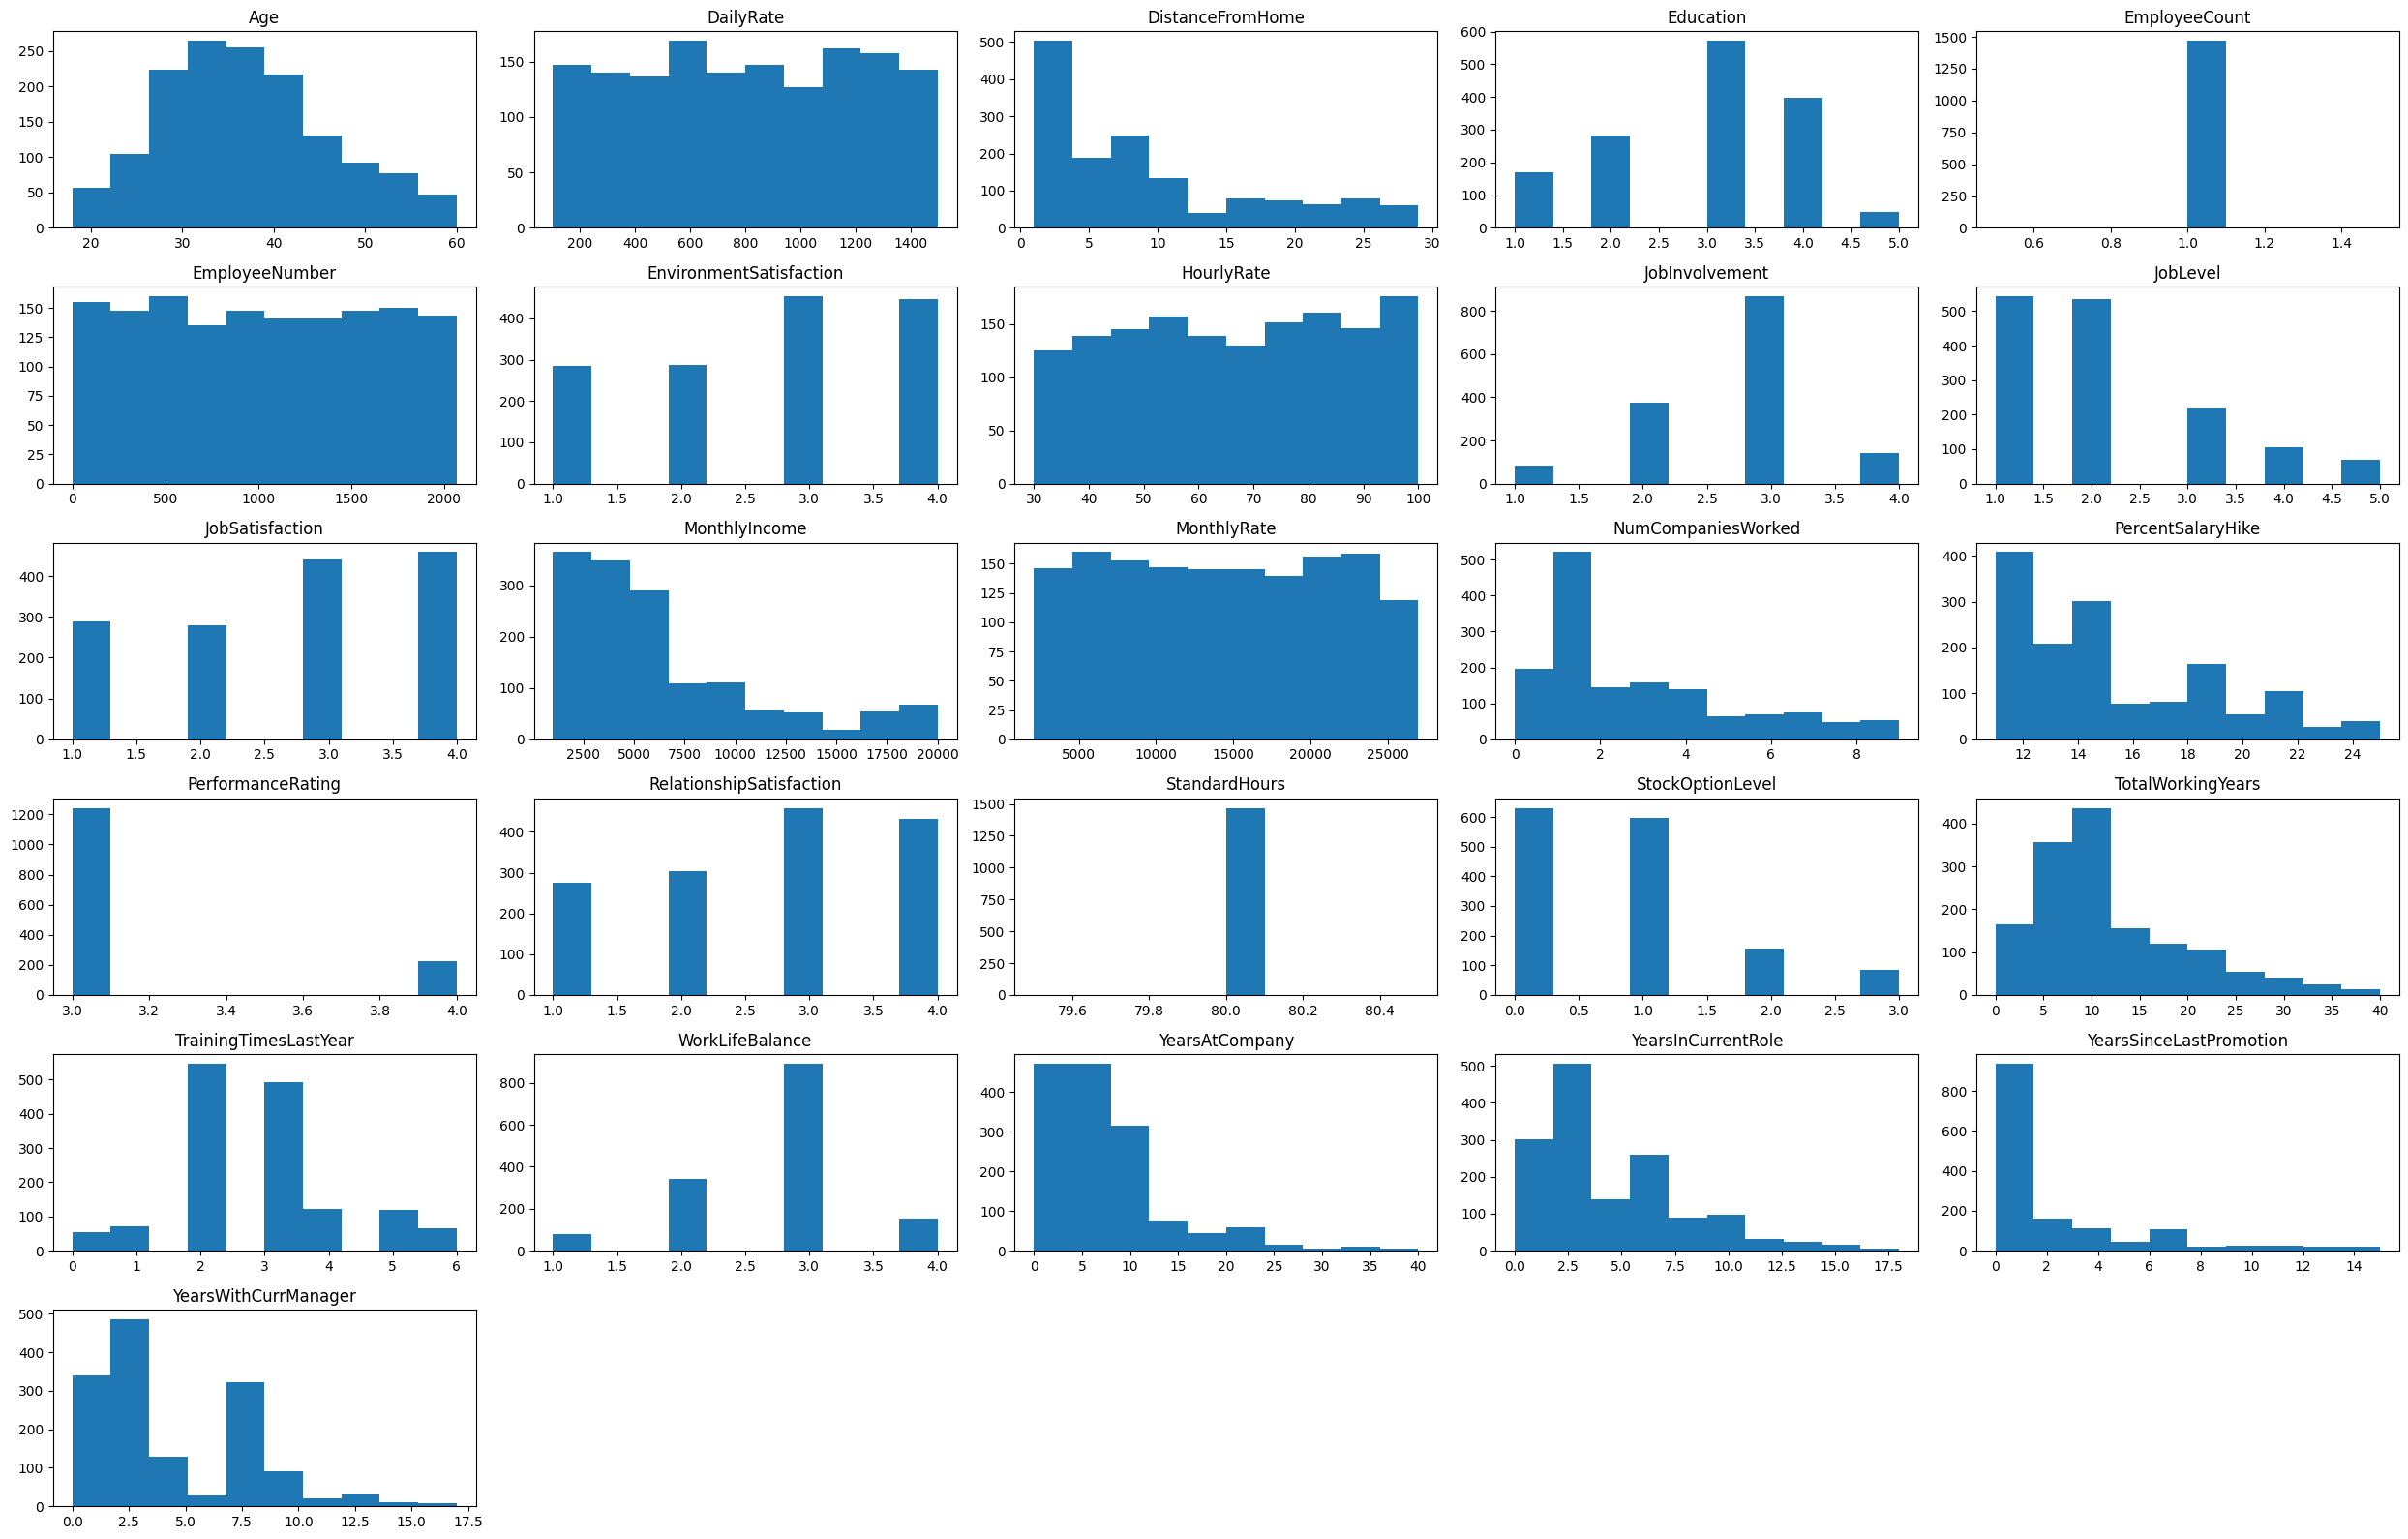

In [17]:
axes = df.hist(figsize=(25,16))

# Remove grid from each subplot
for ax in axes.flatten():
    ax.grid(False)

plt.tight_layout()
plt.show()


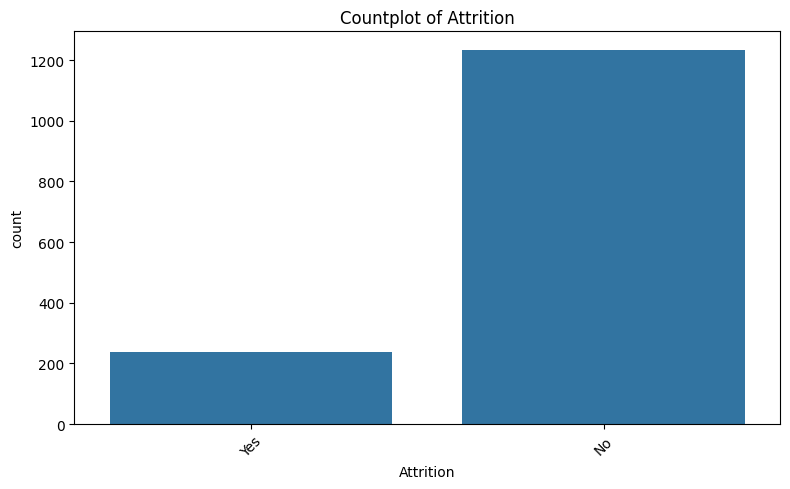

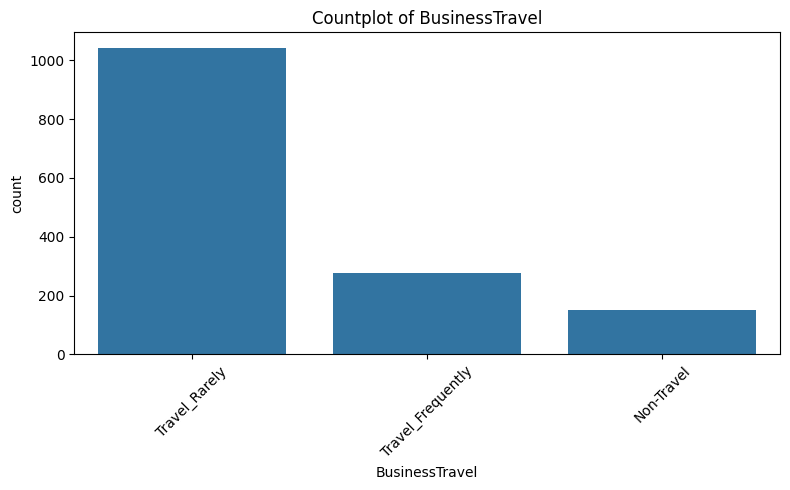

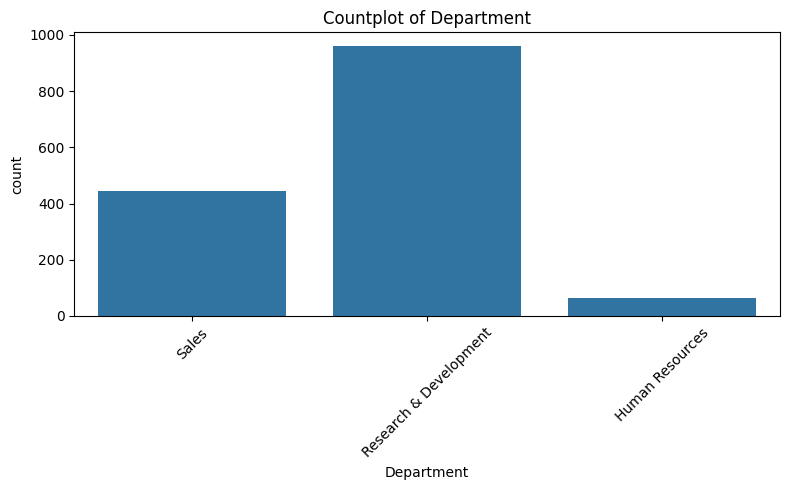

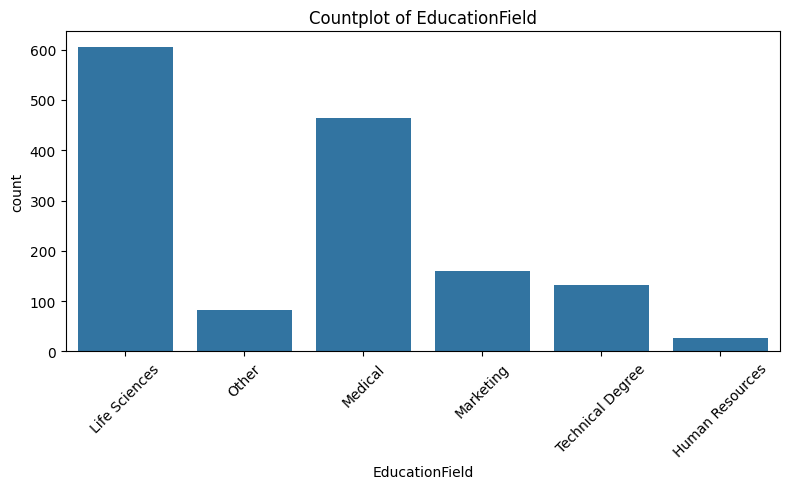

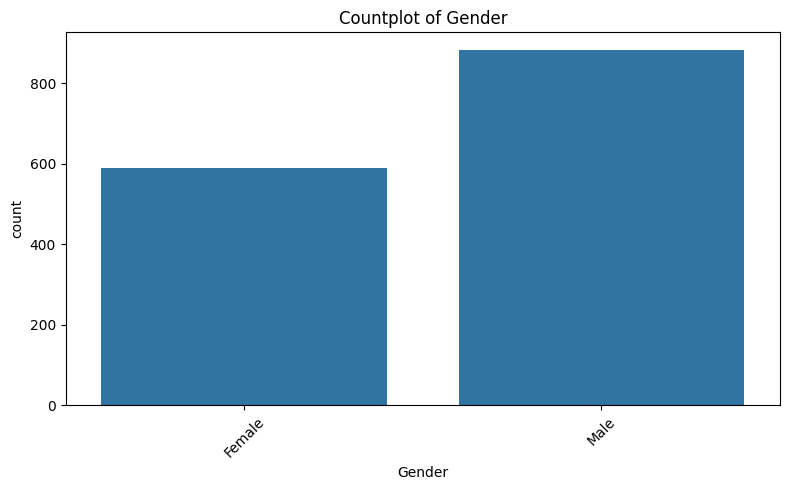

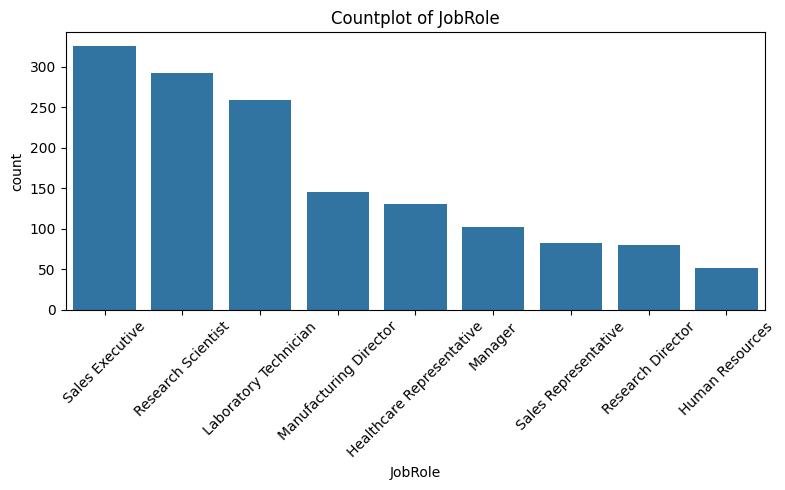

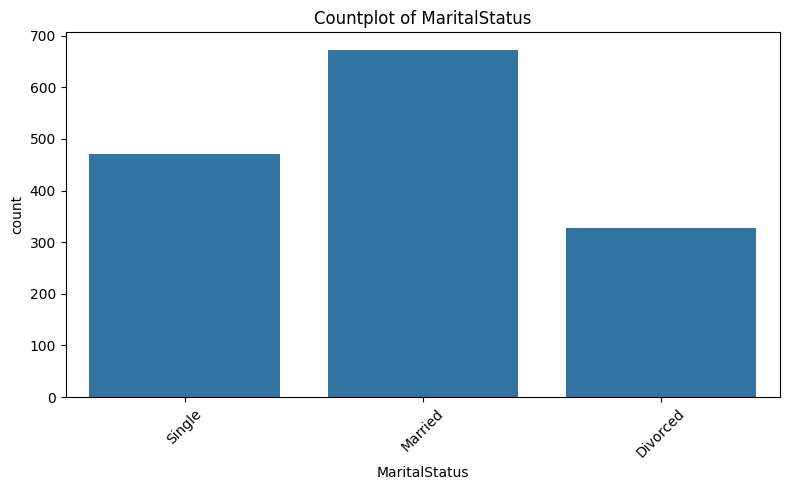

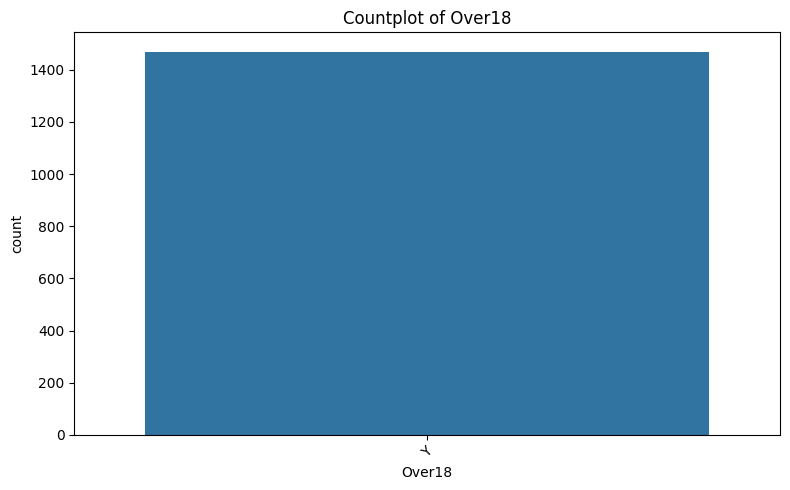

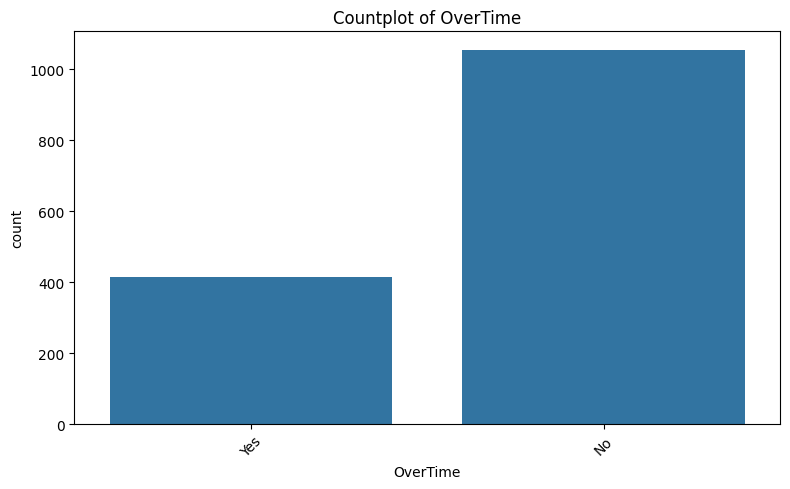

In [18]:
for col in obj_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Step 2.3 

###  Initial Observations
- The dataset contains both numerical and categorical features
- The target variable `Attrition` is categorical (Yes/No)
- Several identifier or constant-value columns are present and not useful for analysis

##  Step 2.4

Dropping unncessary columns

In [19]:
columns_to_drop = [
    "EmployeeNumber", #unique in each employee
    "EmployeeCount", # number of employees
    "Over18", # Since all ages are over 18
    "StandardHours"  # same standardhours
]

df = df.drop(columns=columns_to_drop)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Dropping Non-Informative Columns
- `EmployeeNumber`: Unique identifier with no analytical value
- `EmployeeCount`, `StandardHours`, `Over18`: Constant values across all records
  
Removing these columns simplifies the dataset and prevents noise in analysis.

### Correlation Analysis (Numerical Features)

Correlation analysis is used to explore linear relationships between
numerical features and employee attrition. This helps identify
potential predictors but does not imply causation.

Correlation results are exploratory and are not used to infer causation,
but to guide further analysis and feature selection.


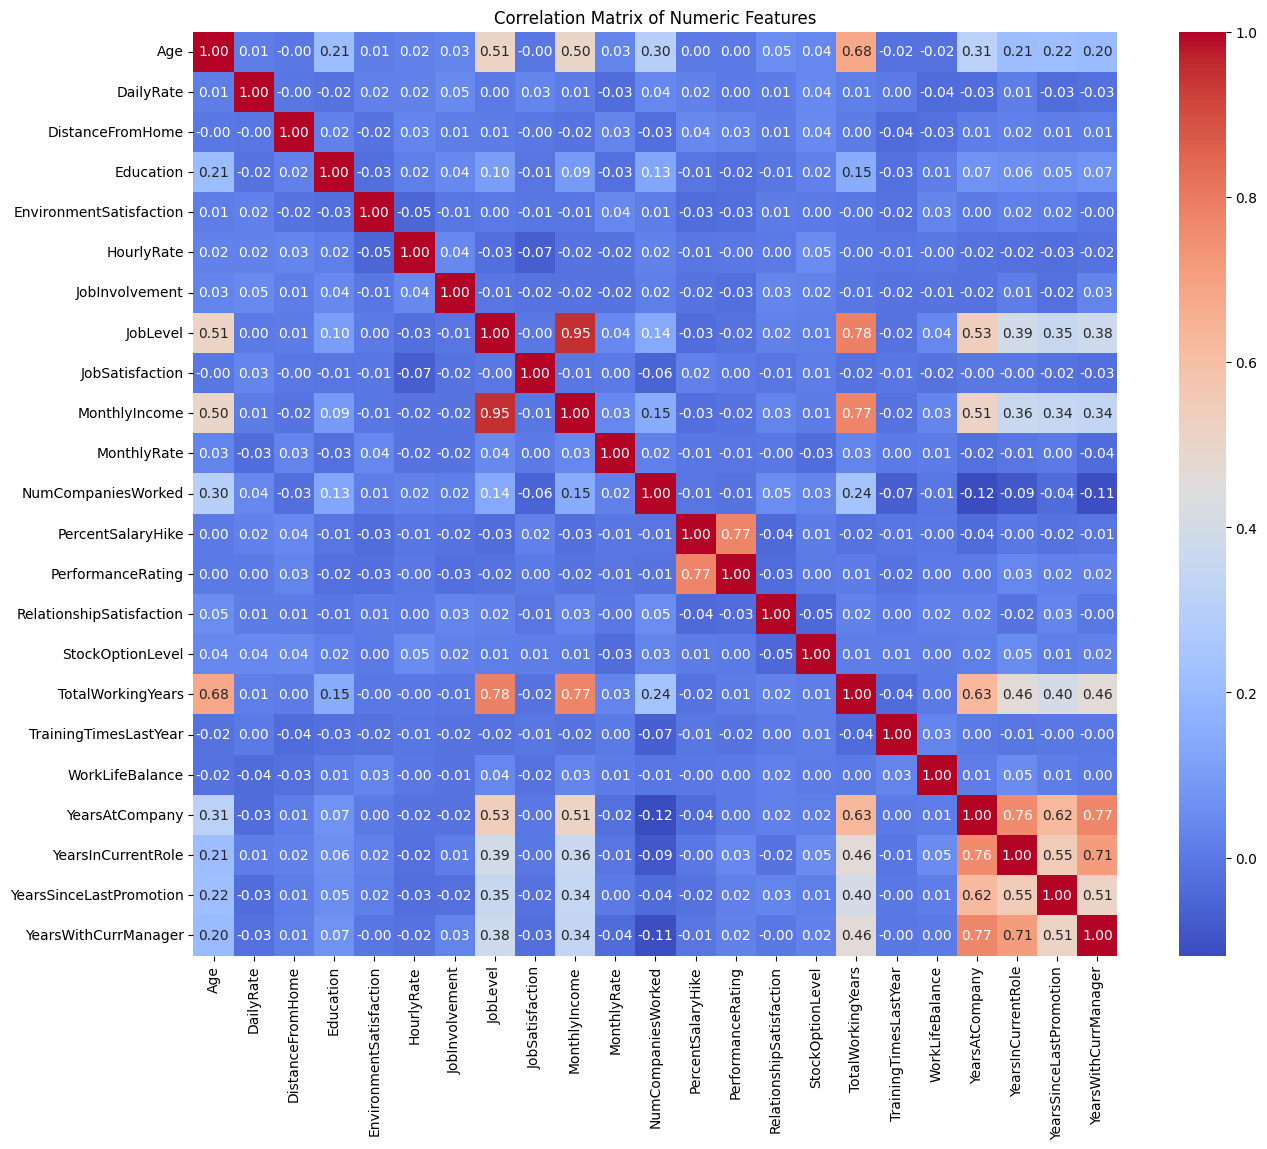

In [20]:

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


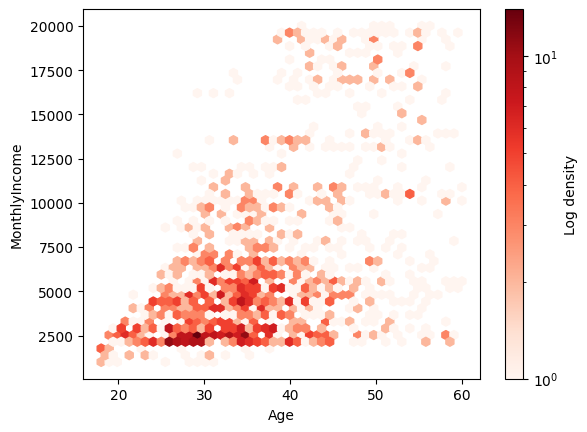

In [21]:
ax = df.plot.hexbin(
    x="Age",
    y="MonthlyIncome",
    gridsize=45,
    cmap="Reds",
    bins="log"
)

ax.collections[0].colorbar.set_label("Log density")

In [22]:
df_corr = df.copy() # I use copy so I cannot change the value of the original value of this dataset
df_corr["Attrition_num"] = df_corr["Attrition"].map({"Yes": 1, "No": 0}) # Temporary numeric encoding target

num_cols = df_corr.select_dtypes(include="number") #Select only numeric features
 
attrition_corr = (
    num_cols.corr()["Attrition_num"]
    .sort_values(ascending=False)
) 

attrition_corr.round(2)

Attrition_num               1.00
DistanceFromHome            0.08
NumCompaniesWorked          0.04
MonthlyRate                 0.02
PerformanceRating           0.00
HourlyRate                 -0.01
PercentSalaryHike          -0.01
Education                  -0.03
YearsSinceLastPromotion    -0.03
RelationshipSatisfaction   -0.05
DailyRate                  -0.06
TrainingTimesLastYear      -0.06
WorkLifeBalance            -0.06
EnvironmentSatisfaction    -0.10
JobSatisfaction            -0.10
JobInvolvement             -0.13
YearsAtCompany             -0.13
StockOptionLevel           -0.14
YearsWithCurrManager       -0.16
Age                        -0.16
MonthlyIncome              -0.16
YearsInCurrentRole         -0.16
JobLevel                   -0.17
TotalWorkingYears          -0.17
Name: Attrition_num, dtype: float64

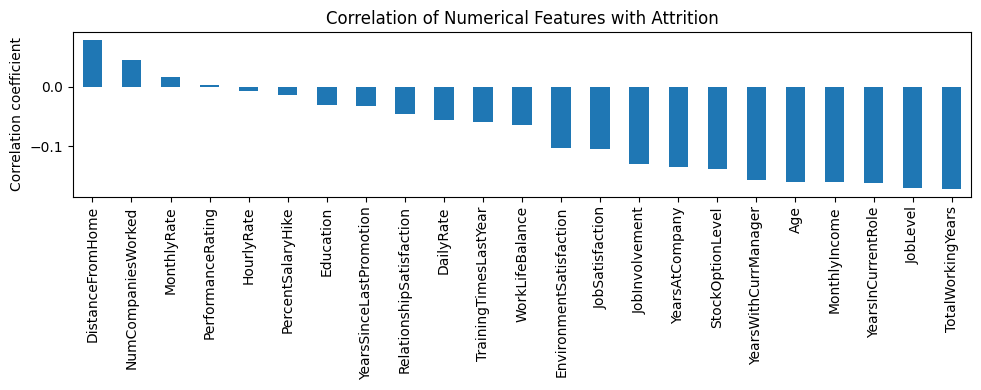

In [23]:
attrition_corr.drop("Attrition_num").plot(kind="bar", figsize=(10, 4),
                                          title="Correlation of Numerical Features with Attrition")
plt.ylabel("Correlation coefficient")
plt.tight_layout()
plt.show()


## Step 2.6: Final Target Encoding + Class Imbalance
This time, we encode for real (this version will be used in modeling).

In [24]:
df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})
df["Attrition"].value_counts()

# 0 -> employee potentially will stay
# 1 -> employee potentially will be left


Attrition
0    1233
1     237
Name: count, dtype: int64

### Step 2.6.2 - check class imbalance

In [25]:
df["Attrition"].value_counts(normalize=True).round(2)

Attrition
0    0.84
1    0.16
Name: proportion, dtype: float64

### Step 2.6.3

### Class Distribution
Employee attrition is an imbalanced target, with significantly more
employees staying than leaving. This reflects real-world conditions
and will be considered during model evaluation, particularly when
selecting recall as a primary metric.


In [26]:
df.isna().sum().sort_values(ascending=False)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

#### Cleaning Summary
- Removed identifier and constant-value columns
- Checked duplicate value
- Encoded the target variable for analysis and modelling
- Confirmed no missing values requiring imputation
- Identified class imbalance in attrition

The dataset is now ready for exploratory data analysis.

# Phase 3: EDA

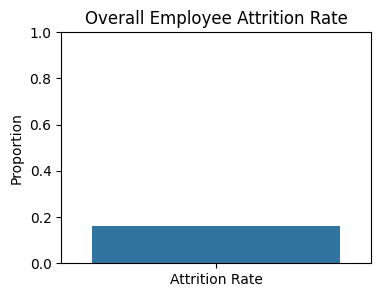

In [27]:
attrition_rate = df["Attrition"].mean()

plt.figure(figsize=(4, 3))
sns.barplot(x=["Attrition Rate"], y=[attrition_rate])
plt.ylim(0, 1)
plt.ylabel("Proportion")
plt.title("Overall Employee Attrition Rate")
plt.show()

**Insight:**  
Approximately {:.0%} of employees have left the organisation.  
This confirms attrition is a meaningful business problem rather than a rare event.


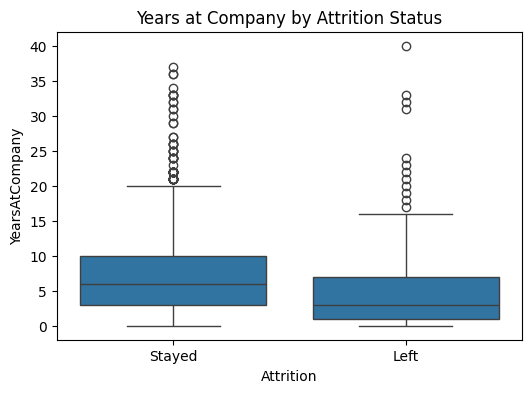

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Attrition", y="YearsAtCompany", data=df)
plt.xticks([0, 1], ["Stayed", "Left"])
plt.title("Years at Company by Attrition Status")
plt.show()


**Insight:**  
Employees who leave tend to have significantly shorter tenure.
This suggests that attrition risk is highest during the early years of employment.

### Attrition vs Monthly Income (Compensation Impact)

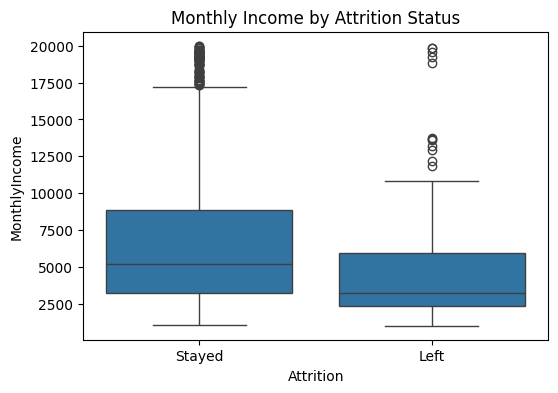

In [29]:
plt.figure(figsize=(6, 4))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df)
plt.xticks([0, 1], ["Stayed", "Left"])
plt.title("Monthly Income by Attrition Status")
plt.show()

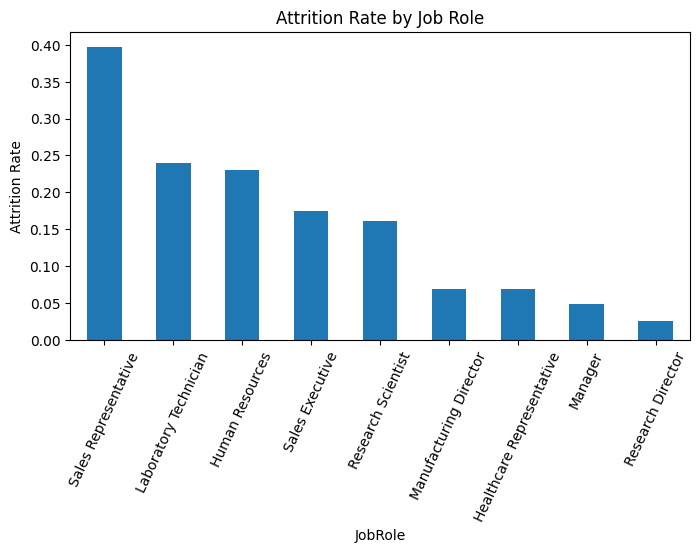

In [30]:
role_attrition = (
    df.groupby("JobRole")["Attrition"]
    .mean()
    .sort_values(ascending=False)
)

plt.figure(figsize=(8, 4))
role_attrition.plot(kind="bar")
plt.xticks(rotation=65)
plt.ylabel("Attrition Rate")
plt.title("Attrition Rate by Job Role")
plt.show()

**Insight:**  
Attrition rates vary substantially across job roles.
This suggests targeted, role-specific retention strategies may be more effective than a one-size-fits-all approach.


### EDA Summary
Attrition is most strongly associated with early tenure, lower income,
and specific job roles. These findings will guide feature engineering
and model development in the next phase.

# Phase 4: Feature Engineering


In [31]:
# tenure buckets

In [32]:
    income_median = df["MonthlyIncome"].median()
    df["HighIncome"] = (df["MonthlyIncome"] > income_median).astype(int)
    
    df["HighIncome"].value_counts()

HighIncome
1    735
0    735
Name: count, dtype: int64

### Feature Engineering Rationale
- Tenure groups capture non-linear attrition risk across employment stages
- Income flag simplifies compensation differences into an interpretable signal
- Features were designed for business interpretability rather than complexity

### Select features & target

In [34]:
features = [
    "Age",
    "MonthlyIncome",
    "YearsAtCompany",
    "TotalWorkingYears",
    "JobLevel",
    "OverTime",
    "HighIncome"
]

X = df[features]
y = df["Attrition"]

In [35]:
# Overtime is categorical (onehot encoded)
X = pd.get_dummies(X, drop_first=True)

### Logistic Regression was selected due to its interpretability and suitability for binary classification problems in a business context.

In [36]:
### Train & Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


In [37]:
from sklearn.preprocessing import StandardScaler
# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
# Train Logistic Regression (with class weights)
model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

In [39]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       309
           1       0.32      0.68      0.44        59

    accuracy                           0.72       368
   macro avg       0.62      0.70      0.63       368
weighted avg       0.83      0.72      0.75       368

ROC-AUC: 0.7308430694970106


### Model Evaluation
Recall is prioritised to minimise the number of at-risk employees
who are incorrectly classified as low risk. The ROC-AUC score
indicates the model's ability to distinguish between employees
who stay and those who leave.

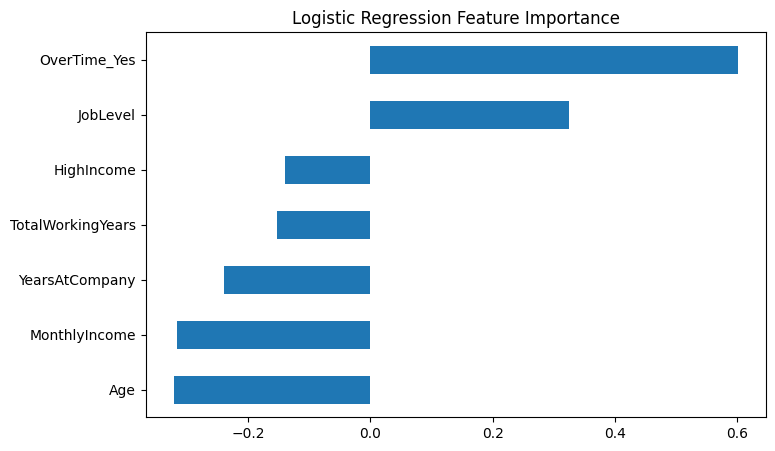

In [42]:
#Model Interpretation

feature_importance = pd.Series(
    model.coef_[0],
    index=X.columns
).sort_values()

feature_importance.plot(kind="barh", figsize=(8, 5))
plt.title("Logistic Regression Feature Importance")
plt.show()

### Model Interpretation
Tenure, income level, and overtime status are among the strongest
predictors of attrition. These factors align with findings from
the exploratory data analysis, reinforcing their business relevance.

# Phase 5

## Key Business Insights

- Employee attrition is most prevalent among employees with shorter tenure,
  particularly within the first few years at the company.
- Lower monthly income is associated with higher attrition risk,
  suggesting compensation sensitivity in certain roles.
- Overtime work and job level contribute meaningfully to attrition risk.
- The predictive model aligns with EDA findings, reinforcing the reliability
  of these factors.

## Business Recommendations

- Prioritise retention programs for employees in their first 2–3 years,
  such as mentoring, onboarding support, and career development plans.
- Review compensation structures for roles with high attrition risk,
  particularly at lower job levels.
- Monitor overtime patterns and address workload imbalance where possible.
- Use the predictive model as a decision-support tool to proactively
  target high-risk employees for HR intervention.


## Limitations & Next Steps

- This analysis uses historical data and does not capture external factors
  such as market conditions or personal circumstances.
- The model focuses on interpretability rather than maximum accuracy.
- Future work could include additional behavioural features,
  time-based validation, or testing alternative models.

These improvements would enhance predictive performance while
maintaining explainability.
